In [ ]:
# IRIS data with sklearn

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.linear_model import LogisticRegression #羅吉斯回歸

In [4]:
data_path = r"D:\01_Taipei_AI\56_Side_Project\Work-Tensorflow-IRIS\Iris.csv"
s = pd.read_csv(data_path, header=0)
iris_data = s.drop('Id',axis=1)

In [22]:
# iris_data.rename(columns={"SepalLengthCm":"花萼長",
#                    "SepalWidthCm":"花萼寬",
#                    "PetalLengthCm":"花瓣長",
#                    "PetalWidthCm":"花瓣寬",
#                    "Species":"種類"},inplace=True)
# kind_dict = {
#     "Iris-setosa":"山鳶尾",
#     "Iris-versicolor":"染色鳶尾",
#     "Iris-virginica":"維吉尼亞鳶尾"
# }

# iris_data

,Id,花萼長,花萼寬,花瓣長,花瓣寬,種類
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.head(5) #顯示前5筆

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


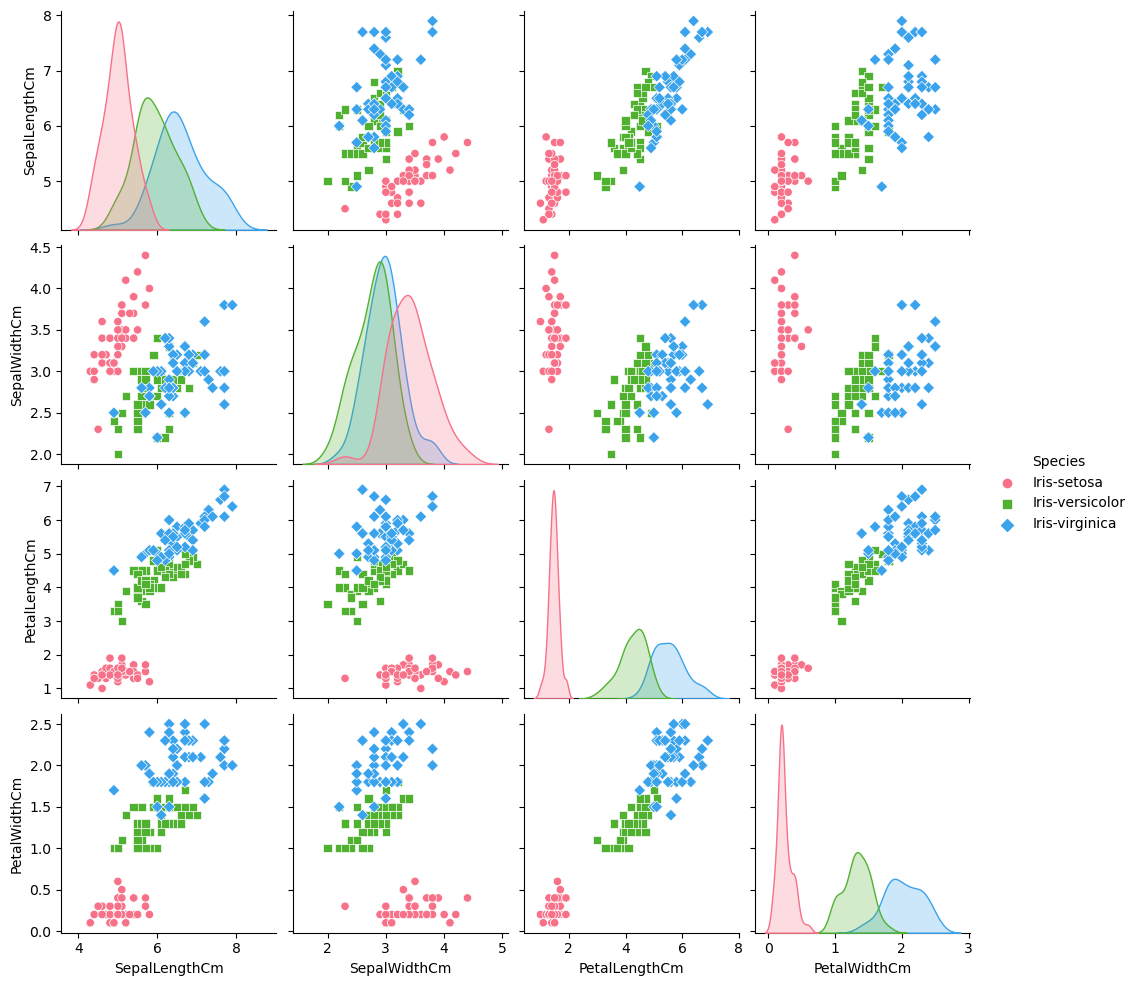

In [8]:
# 特徵關係
# sns.pairplot(iris_data.drop('Id', axis=1), hue='Species',palette="husl", markers=["o", "s", "D"])

sns.pairplot(iris_data, hue='Species',palette="husl", markers=["o", "s", "D"])


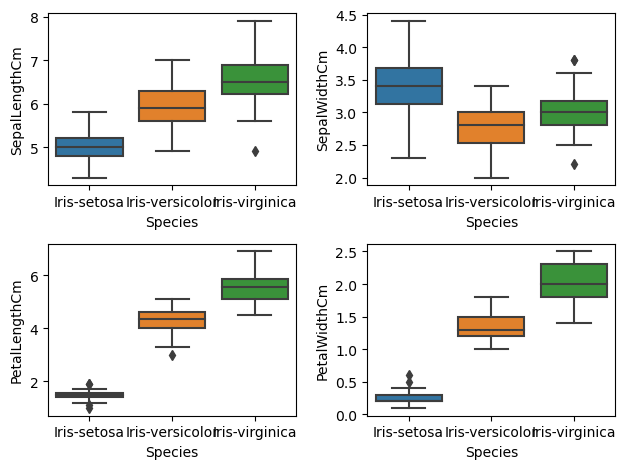

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2) #建立子圖表、箱型圖，比較各種類數據分布
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = iris_data, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = iris_data, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris_data, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = iris_data, ax = axs[1,1]);
plt.tight_layout() # 自動調整間距

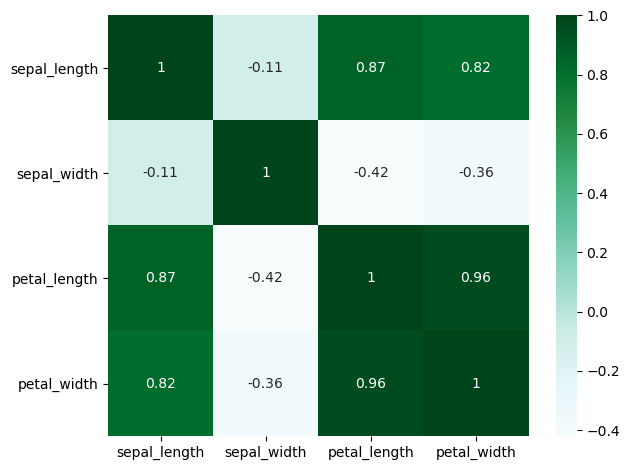

In [11]:
# heatmap 熱力圖
# corr = iris_data.drop('Id', axis=1).corr()
corr = iris_data.corr()
sp_name = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
sns.heatmap(corr, annot=True, cmap='BuGn',square=True, xticklabels=sp_name, yticklabels=sp_name)

# 調整y 軸標籤位置
plt.yticks(rotation=0)
plt.tight_layout() # 自動調整

In [15]:
x_label = iris_data.iloc[:,1:5]
y_label = iris_data.iloc[:,5:]

In [1]:
進行資料分割
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size = 0.3, random_state = 42) # 設置 random_state確保每次劃分可得結果
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)

In [ ]:
data_path = r"your_path"
iris_data = pd.read_csv(data_path, header=0)

In [10]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import scale
# iris = datasets.load_iris()
# x_label = iris.data
# y_label = iris.target

x_label = iris_data.iloc[:,1:5]
y_label = iris_data.iloc[:,5:]
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y_label)

kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(x_label)
prediction = kmeans.labels_
labels = ['setosa', 'versicolor', 'virginica']
pd.DataFrame(confusion_matrix(y_label_encoded , prediction), columns=labels, index=labels)

# clustering = KMeans(n_clusters=3, random_state=5)
# clustering.fit(iris_data)

C:\Users\user\anaconda3\envs\Tensorflow2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,setosa,versicolor,virginica
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36
